#  State-Of-Health Estimation of  Lithium-ion Pouch Cells Using Artificial Neural Network
Artificial Neural Network (ANN) has been used to estimate state-of-health (SOH) of lithium-ion pouch cells. The batteries were stored at different storage temperature (35°C and 60°C) and conditions (fully-discharged and fully-charged) and their capacity was recorded for the duration of 10 months at one-month intervals. 

## Library Imports

In [184]:
# Numpy and Pandas 
import numpy as np
import pandas as pd

# Vizualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# Machine learning algorithms
from sklearn.neural_network import MLPRegressor

# Machine learning pipeline 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Regression Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Ignore ConvergenceWarning messages
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# Check the fitted_model
from sklearn.exceptions import NotFittedError

# Save python obect to disk
import pickle

## Exploratory Analysis

In [185]:
df = pd.read_csv('soh.csv')
df.head()

,SOH,month,Temp,Charged
0,0.975434,0,0,0
1,0.984243,1,0,0
2,0.992927,2,0,0
3,0.993066,3,0,0
4,0.992711,4,0,0


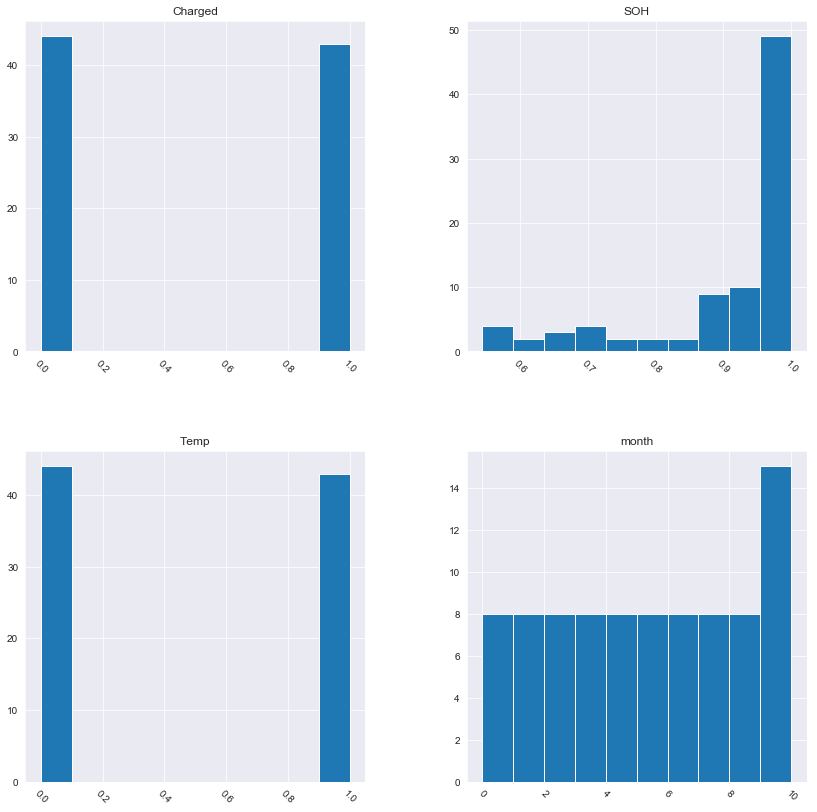

In [186]:
df.hist(figsize=(14,14), xrot=-45)
plt.show()

In [187]:
df.describe()

,SOH,month,Temp,Charged
count,87.000000,87.000000,87.000000,87.000000
mean,0.898660,4.942529,0.494253,0.494253
std,0.124104,3.152542,0.502865,0.502865
min,0.544034,0.000000,0.000000,0.000000
25%,0.878844,2.000000,0.000000,0.000000
50%,0.963619,5.000000,0.000000,0.000000
75%,0.979417,8.000000,1.000000,1.000000
max,1.000000,10.000000,1.000000,1.000000


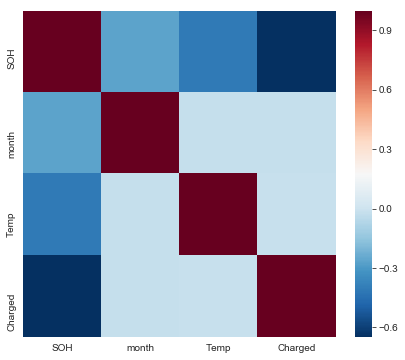

In [188]:
correlations = df.corr()
plt.figure(figsize=(7,6))
sns.heatmap(correlations, cmap='RdBu_r')
plt.show()

## Algorithm Selection

In [189]:
df['month'] = df['month'].astype(float)
df['Temp'] = df['Temp'].astype(float)
df['Charged'] = df['Charged'].astype(float)
y = df.SOH
X = df.drop('SOH', axis=1)

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)
pipelines = {
    'mlp'   : make_pipeline(StandardScaler(), MLPRegressor(random_state=123))
}

In [191]:
# MLP hyperparameters
mlp_hyperparameters = {
    'mlpregressor__alpha': [0.0001, 0.01, 1],
    'mlpregressor__hidden_layer_sizes': [(3,), (5,), (7,), (10,), (40,)],
    'mlpregressor__activation': ['logistic', 'relu']
}

# Create hyperparameters dictionary
hyperparameters = {
    'mlp': mlp_hyperparameters
}

In [192]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

mlp has been fitted.


C:\Users\a2ghorba\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [193]:
for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print (name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

mlp has been fitted.


## ANN performance

In [194]:
for name,model in fitted_models.items():
    pred = fitted_models[name].predict(X_test)
    print(name)
    print('R2:', r2_score(y_test, pred))
    print('MAE:', mean_absolute_error(y_test, pred))

mlp
R2: 0.7637384160064201
MAE: 0.026107481432609065


## Insight & Analysis

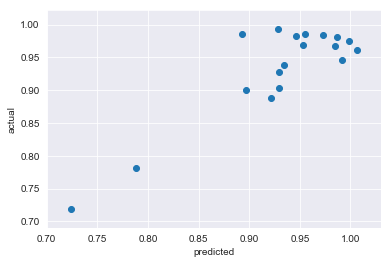

In [195]:
mlp_pred = fitted_models['mlp'].predict(X_test)
plt.scatter(mlp_pred, y_test)
plt.xlabel('predicted')                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
plt.ylabel('actual')
plt.show()

In [196]:
fitted_models['mlp'].best_estimator_

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlpregressor', MLPRegressor(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(40,), learning_rate='constant',
       le...=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])

In [197]:
with open('MLP_SOH_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['mlp'].best_estimator_, f)